In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [57]:
math = pd.read_csv("../../data/processed/cleaned-student-mat.csv")

### Scaling

In [58]:
scaler = StandardScaler()
scaler.fit(X)
scaler.transform(X)

array([[ 1.06162997,  1.10253511,  1.34274041, ...,  2.47790234,
         0.20203051, -2.27050048],
       [ 0.27204268, -1.64354652, -1.42811697, ..., -0.40356716,
         0.20203051,  0.44043153],
       [-1.30713191, -1.64354652, -1.42811697, ...,  2.47790234,
         0.20203051,  0.44043153],
       ...,
       [ 3.43039185, -1.64354652, -1.42811697, ..., -0.40356716,
         0.20203051, -2.27050048],
       [ 1.06162997,  0.18717456, -0.50449784, ..., -0.40356716,
         0.20203051,  0.44043153],
       [ 1.85121727, -1.64354652, -1.42811697, ..., -0.40356716,
         0.20203051,  0.44043153]])

### Split

In [59]:
y = math['final_grade']
X = math.drop('final_grade', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### Model

In [60]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [61]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean Squared Error:', mse)
print('R-squared:', r2)

Mean Squared Error: 0.8077187190394328
R-squared: 0.9162975074942504


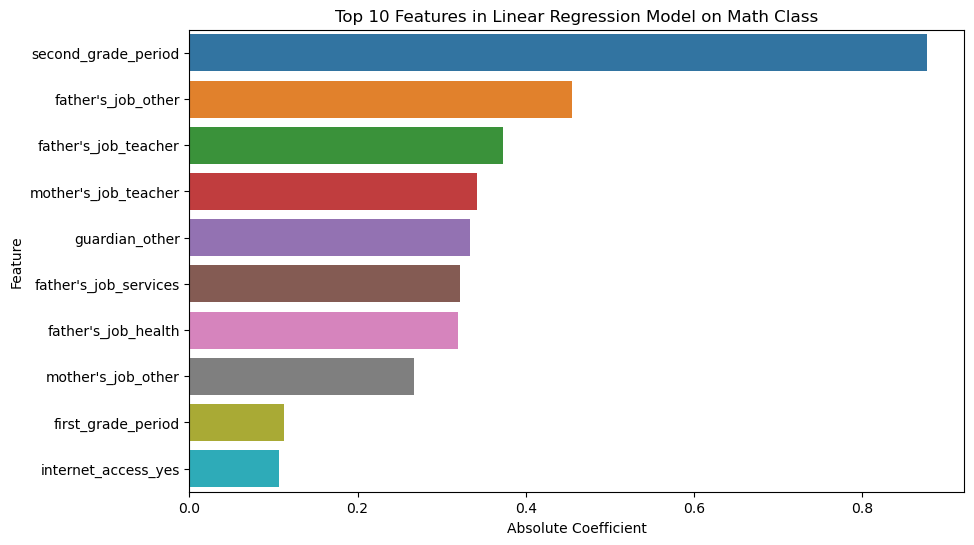

In [62]:
coefficients = model.coef_

# Create a DataFrame for feature names and their corresponding coefficients
feature_names = X.columns  # Feature names after one-hot encoding
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort and visualize
coef_df['Abs_Coefficient'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values(by='Abs_Coefficient', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(data=coef_df.head(10), x='Abs_Coefficient', y='Feature')
plt.title('Top 10 Features in Linear Regression Model on Math Class')
plt.xlabel('Absolute Coefficient')
plt.ylabel('Feature')
plt.show()

In [63]:
coef_df

,Feature,Coefficient,Abs_Coefficient
11,second_grade_period,0.877720,0.877720
18,father's_job_other,0.455400,0.455400
20,father's_job_teacher,0.373405,0.373405
16,mother's_job_teacher,0.342021,0.342021
22,guardian_other,-0.333700,0.333700
19,father's_job_services,0.321865,0.321865
17,father's_job_health,0.319097,0.319097
14,mother's_job_other,-0.267647,0.267647
10,first_grade_period,0.112256,0.112256
25,internet_access_yes,0.106836,0.106836
